# Importing Library

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Importing Dataset

 Dataset yang dipilih adalah seluler.csv

In [7]:
df=pd.read_csv('seluler.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

Tidak terdapat NaN Value pada dataset
Data terdiri dari 7043 baris dan 21 kolom

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


Terdapat 3 kolom yang merupakan integer yaitu SeniorCitizen, tenure dan MonthlyCharges.

## Descriptive Statistics for Numeric Datas / Integer Values - Data Visualization

In [62]:
data_temp = df[['SeniorCitizen','tenure','MonthlyCharges']]

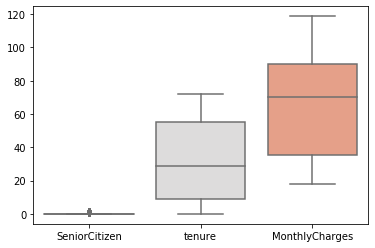

In [64]:
sns.boxplot(data=data_temp, palette='coolwarm')

Dari data integer yang ada, tidak diperoleh adanya outlier <br>
Nilai mean masing-masing ada di angka 0.162147, 32.371149, dan 64.761692 <br>
Perlu dicatat Senior Citizen hanya bernilai 0 atau 1

# Identifikasi Masalah

In [25]:
len(df[df['Churn'] == 'Yes']) # filter Churn = 'Yesb'

1869

In [36]:
plgg_pindah = 1869
total_plgg = 7043
plgg_tetap = total_plgg - plgg_pindah

In [37]:
plgg_pindah / total_plgg * 100

26.536987079369588

In [38]:
plgg_tetap / total_plgg * 100

73.4630129206304

## Identifikasi Masalah - Data Visualization

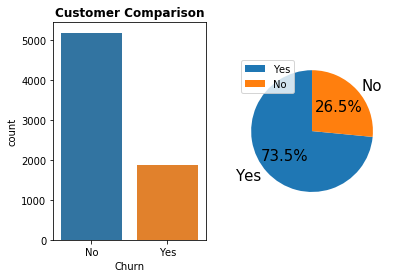

In [57]:
persentase = [73.4, 26.5]
nama = ['Yes','No']

plt.subplot(121)
plt.title("Customer Comparison", size= 12, fontweight="bold")
sns.countplot(x='Churn', data=df)

plt.subplot(122)
x = plt.pie (persentase,labels= nama,startangle=90,
        shadow= False,textprops={"size":15, "color":"k"},
        autopct = "%1.1f%%", radius=1)
plt.legend()

        
plt.show()

Terdapat 1869 customer yang memutuskan untuk berpindah provider dari total 7043 customer atau 26.53% dan <br>
terdapat 5174 customer yang tetap di provider yang sama atau 73.46%. <br>
Masalah yang paling terlihat oleh penulis adalah : <br>

    1. Faktor apa yang membuat customer untuk berpindah atau tetap di provider tersebut?  
    2. Apakah gender mempengaruhi faktor churn dalam dataset? 

# EDA - Exploratory Data Analysis

EDA bertujuan untuk menjawab 3 pertanyaan diatas

1. Faktor apa yang membuat customer untuk berpindah atau tetap di provider tersebut?

## Comparing Categorical Data

In [69]:
df.columns.unique()

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

### Gender

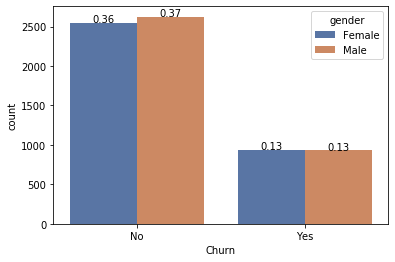

In [115]:
ax = sns.countplot(x='Churn', hue='gender' ,data=df,palette='deep')
total = len(df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center")
plt.show()

### Senior Citizen - Biggest Factor for NOT Churn

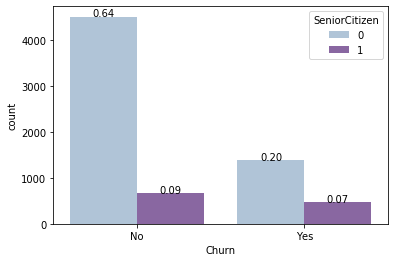

In [118]:
ax = sns.countplot(x='Churn', hue='SeniorCitizen' ,data=df,palette='BuPu')
total = len(df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center")
plt.show()

### Partner

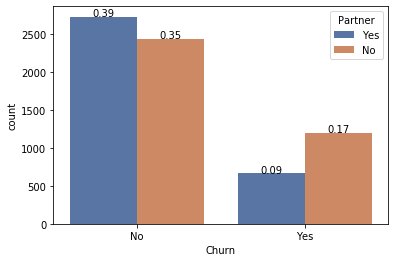

In [119]:
ax = sns.countplot(x='Churn', hue='Partner' ,data=df,palette='deep')
total = len(df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center")
plt.show()

### Dependents - Second Biggest Factor for NOT Churn

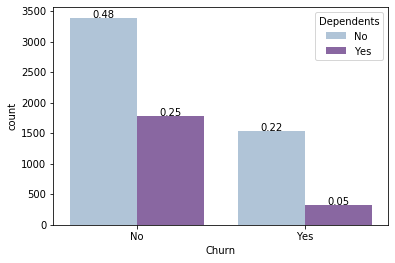

In [137]:
ax = sns.countplot(x='Churn', hue='Dependents' ,data=df,palette='BuPu')
total = len(df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center")
plt.show()

### Phone Service - Biggest Factor for Churn

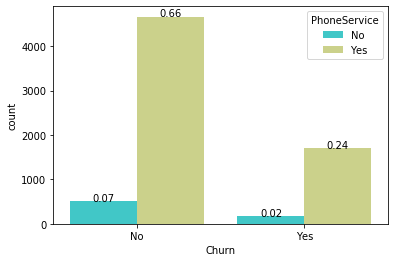

In [121]:
ax =sns.countplot(x='Churn', hue='PhoneService' ,data=df,palette='rainbow')
total = len(df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center")
plt.show()

### MultipleLines

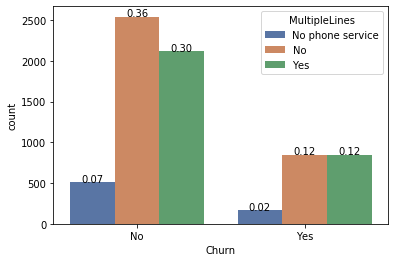

In [138]:
ax=sns.countplot(x='Churn', hue='MultipleLines' ,data=df,palette='deep')
total = len(df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center")
plt.show()

### Internet Service

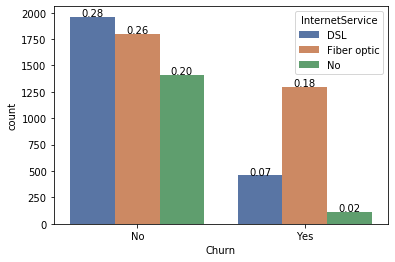

In [139]:
ax=sns.countplot(x='Churn', hue='InternetService' ,data=df,palette='deep')
total = len(df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center")
plt.show()

### Online Security

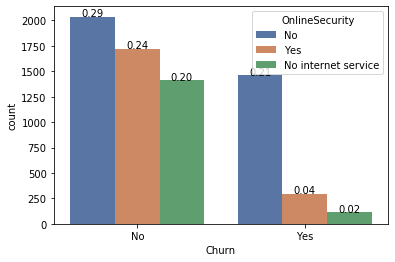

In [140]:
ax=sns.countplot(x='Churn', hue='OnlineSecurity' ,data=df,palette='deep')
total = len(df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center")
plt.show()

### Online Backup

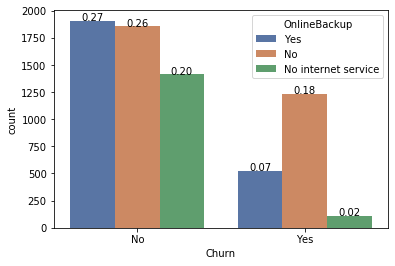

In [141]:
ax=sns.countplot(x='Churn', hue='OnlineBackup' ,data=df,palette='deep')
total = len(df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center")
plt.show()

### Device Protection

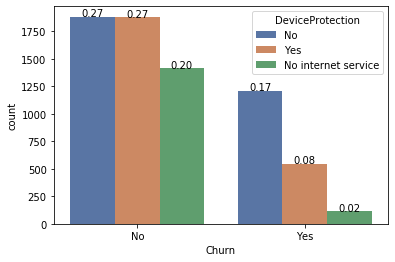

In [142]:
ax=sns.countplot(x='Churn', hue='DeviceProtection' ,data=df,palette='deep')
total = len(df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center")
plt.show()

### Streaming TV

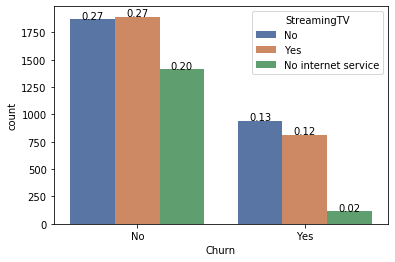

In [143]:
ax=sns.countplot(x='Churn', hue='StreamingTV' ,data=df,palette='deep')
total = len(df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center")
plt.show()

### Tech Support

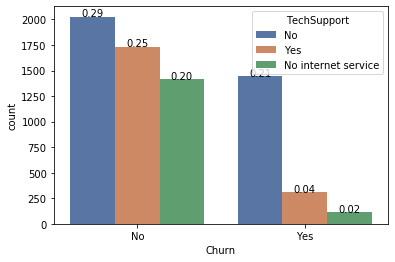

In [129]:
ax=sns.countplot(x='Churn', hue='TechSupport' ,data=df,palette='deep')
total = len(df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center")
plt.show()

### Streaming Movies

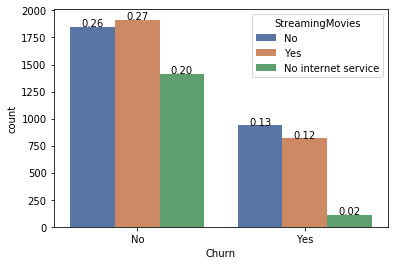

In [144]:
ax=sns.countplot(x='Churn', hue='StreamingMovies' ,data=df,palette='deep')
total = len(df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center")
plt.show()

### Contract - Second Biggest Factor for Churn

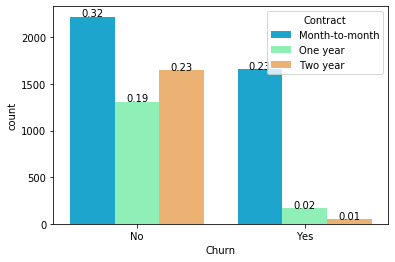

In [131]:
ax=sns.countplot(x='Churn', hue='Contract' ,data=df,palette='rainbow')
total = len(df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center")
plt.show()

### Paperless Billing

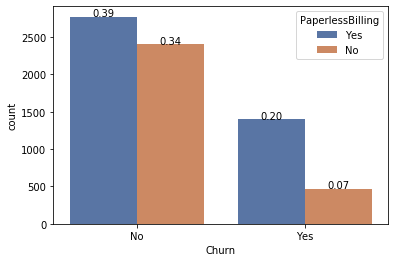

In [145]:
ax=sns.countplot(x='Churn', hue='PaperlessBilling' ,data=df,palette='deep')
total = len(df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center")
plt.show()

### Payment Method

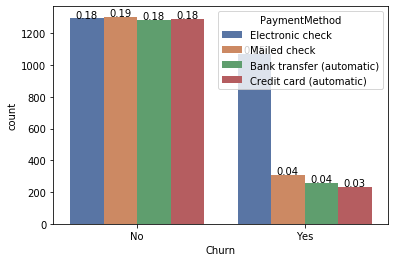

In [146]:
ax=sns.countplot(x='Churn', hue='PaymentMethod' ,data=df,palette='deep')
total = len(df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center")
plt.show()

Secara data Kategori, faktor terbesar yang mempengaruhi churn adalah Phone Service (Yes option) sebesar 24% dan yang kedua terbesar adalah Contract dengan tipe month-to-month sebesar 23%. <br>
Dari sini dapat disimpulkan bahwa pengaruh terbesar customer berpindah provider (churn) adalah: <br>

    1. Phone Service 
    2. Contract with month-to-month method
    
Secara Kategori dapat disimpulkan juga faktor terbesar yang membuat customer tidak berganti provider yaitu Senior Citizen (64%) dan Dependencies (48%)  
Dari sini dapat disimpulkan bahwa pengaruh terbesar customer untuk setia pada provider atau tidak berpindah (churn) adalah: <br>

    1. Senior Citizen
    2. Dependency

## Comparing Numerical Data

(3, 0)

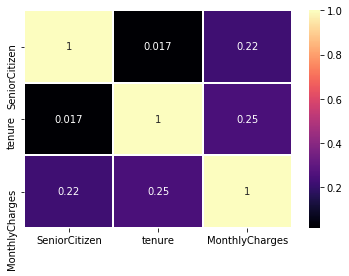

In [135]:
korelasi = sns.heatmap(df.corr(),cmap='magma',annot=True,linecolor='white',linewidths=1)
korelasi.set_ylim(3,0)

Dari data diatas dapat diperoleh insight bahwa TIDAK DAPAT diambil kesimpulan dari numerical data karena korelasi yang ada < 50%

2. Apakah gender mempengaruhi faktor churn pada dataset?

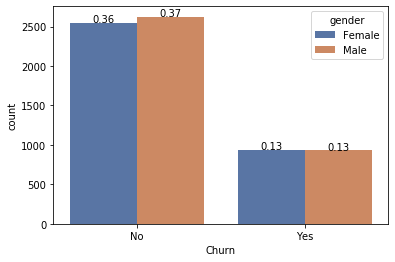

In [136]:
ax = sns.countplot(x='Churn', hue='gender' ,data=df,palette='deep')
total = len(df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center")
plt.show()

Dapat dilihat (insight) pada comparison diatas memiliki selisih 1%, sehingga gender TIDAK mempengaruhi faktor churn pada dataset <br>

In [149]:
df['PhoneService'].unique()

array(['No', 'Yes'], dtype=object)

# Kesimpulan dan Saran

## Kesimpulan : 

Faktor Churn dipengaruhi oleh : 
1. Phone Service - Penyertaan servis telepon oleh provider
2. Contract with month to month method

Faktor untuk tidak berpindah (NOT Churn) dipengaruhi oleh : 
1. Senior Citizen - Orang lanjut usia yang sudah setia dengan providernya
2. Dependency - Kelompok customer yang memiliki tunjangan lain selain dirinya (anak, lanjut usia etc.)

Tidak adanya korelasi gender kepada faktor Churn


## Saran : 

1. Dalam memasarkan provider, perlu diiringi dengan adanya pelayanan servis telepon.
2. Gunakan sistem kontrak per bulan karena metode kontrak inilah yang paling disukai customer.
3. Pemasaran sebaiknya dilakukan kepada customer yang memliki anggota keluarga yang besar (adanya anak / kakek atau nenek) di rumahnya.
4. Pusatkan pemasaran untuk golongan customer usia muda, karena golongan usia tua (biasanya usia 60 ke atas) cenderung sudah setia dengan provider yang mereka punya.
